In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [2]:
dataFile = r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\sel_cells_20_50_10.csv'

In [3]:
myData = pd.read_csv(dataFile)

### Add useful transformations

In [4]:
# add physical time based on DHB length
myData['age_track'] = (myData.DHB_len - 1) *10 / 60

In [5]:
# add day of experiments (with 'd' because otherwise seaborn fails to recognize it as a category)
myData['day']=[f"d{x.split('_')[0]}" for x in myData.file]
myData = myData.astype({"day": 'object'})
set(myData['day'])

{'d20190506',
 'd20190607',
 'd20190609',
 'd20190625',
 'd20190701',
 'd201907012',
 'd201907016'}

In [6]:
myData.head()

,Unnamed: 0,Unnamed: 0.1,file,original cell name,Amy_mod,movie,x,y,ab1 (heterochromatin),ab1 ch,...,hetChrom_10_volume,random_10_volume,hetChrom_10perc_ch1,random_10perc_ch1,hetChrom_10perc_ch2,random_10perc_ch2,hetChrom_10perc_ch3,random_10perc_ch3,age_track,day
0,0,0,20190625_cell-00.czi,7LE1(B),1130/10,190619-cdc6-dhb-pcna002xy09,172,956,HP1B,1,...,45987.0,46247.0,6.366278e+08,281528813.0,174067475.0,131640512.0,1.352231e+09,1.043517e+09,0.666667,d20190625
1,1,1,20190625_cell-01.czi,7L-E1(T),0,190619-cdc6-dhb-pcna002xy09,158,906,HP1B,1,...,43651.0,43924.0,5.861875e+08,266516067.0,162411790.0,128299406.0,1.353023e+09,1.065184e+09,0.666667,d20190625
2,2,2,20190625_cell-02.czi,7L-E2(B),0,190619-cdc6-dhb-pcna002xy09,832,252,HP1B,1,...,39698.0,39812.0,6.928624e+08,318905411.0,194622718.0,148176740.0,1.366670e+09,1.118365e+09,2.000000,d20190625
3,3,3,20190625_cell-03.czi,7L-E2(T),0,190619-cdc6-dhb-pcna002xy09,888,160,HP1B,1,...,42159.0,41848.0,6.473978e+08,285348983.0,195376713.0,139563277.0,1.298882e+09,1.038559e+09,2.000000,d20190625
4,4,4,20190625_cell-05.czi,7L-G2,0,190619-cdc6-dhb-pcna002xy09,172,324,HP1B,1,...,81411.0,81271.0,1.506281e+09,698512214.0,248463390.0,183210463.0,2.583220e+09,2.158853e+09,19.500000,d20190625


In [7]:
myDataSel=myData.loc[((myData.decon==True) & (myData['ab1 (heterochromatin)']=='HP1B')),:].copy()

In [8]:
myDataSel["euchro_20perc_ch2"]=myDataSel.nucleus_Otsu_ch2 - myDataSel.hetChrom_20perc_ch2

In [9]:
myDataSel["euchro_20perc_ch3"]=myDataSel.nucleus_Otsu_ch3 - myDataSel.hetChrom_20perc_ch3

In [10]:
myDataSelnd=myData.loc[((myData.decon==False) & (myData['ab1 (heterochromatin)']=='HP1B')),:].copy()

In [11]:
myDataSelnd["euchro_20perc_ch2"]=myDataSelnd.nucleus_Otsu_ch2 - myDataSelnd.hetChrom_20perc_ch2

In [12]:
myDataSelnd["euchro_20perc_ch3"]=myDataSelnd.nucleus_Otsu_ch3 - myDataSelnd.hetChrom_20perc_ch3

In [13]:
myTrendData=pd.DataFrame(columns=["trendName", "slope", "intercept", "rvalue", "pvalue", "stderr","rsquared"])

In [14]:
myTrendDatand=pd.DataFrame(columns=["trendName", "slope", "intercept", "rvalue", "pvalue", "stderr","rsquared"])

In [15]:
myTrendDataHetvsEu=pd.DataFrame(columns=["trendName", "slope", "intercept", "rvalue", "pvalue", "stderr","rsquared"])

### MCM/DAPI vs Molecular age - original in euchromatin

<IPython.core.display.Javascript object>


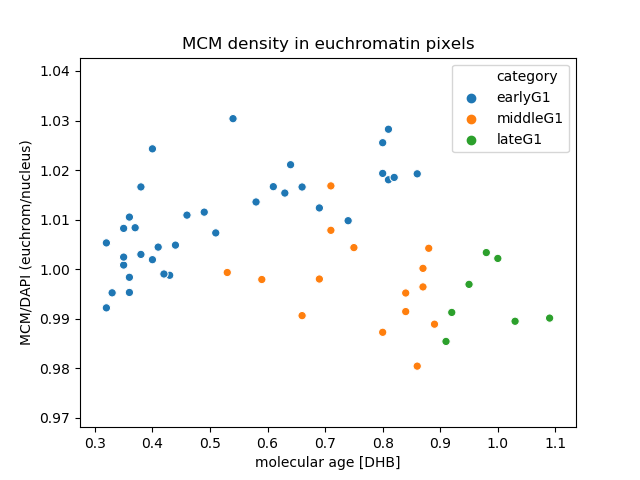

Text(0.5, 1.0, 'MCM density in euchromatin pixels')

In [16]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.euchro_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.euchro_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (euchrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in euchromatin pixels")

<IPython.core.display.Javascript object>


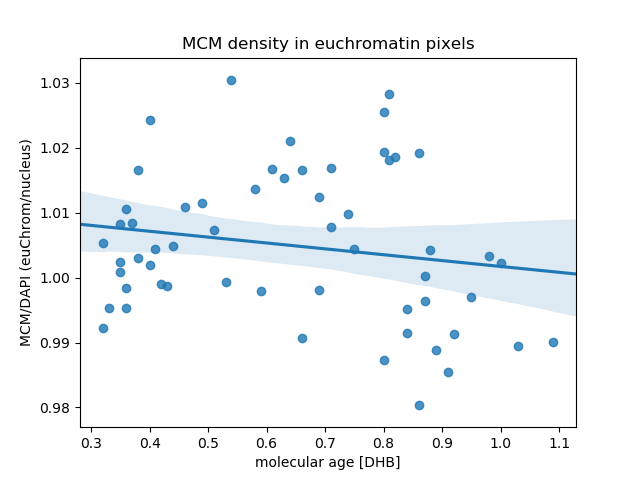

Text(0.5, 1.0, 'MCM density in euchromatin pixels')

In [17]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.euchro_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.euchro_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (euChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in euchromatin pixels")

In [18]:
x = np.array(myDataSel.molecularAge_ratio)
y = np.array(myDataSel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)

In [19]:
myTrendData=myTrendData.append(pd.Series(['original', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### not deconvolved

<IPython.core.display.Javascript object>


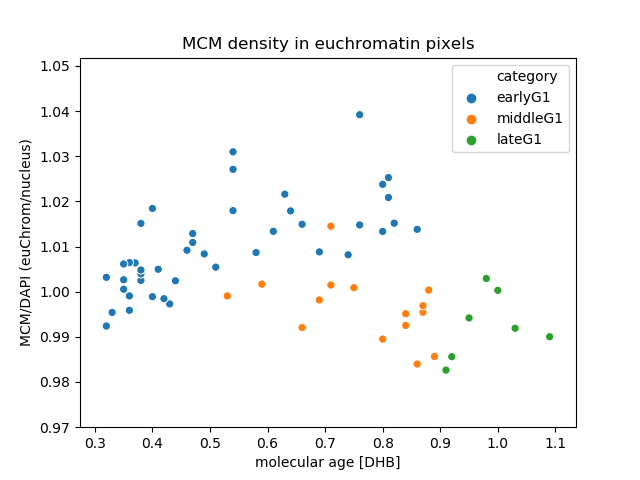

Text(0.5, 1.0, 'MCM density in euchromatin pixels')

In [20]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.euchro_20perc_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.euchro_20perc_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (euChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in euchromatin pixels")

<IPython.core.display.Javascript object>


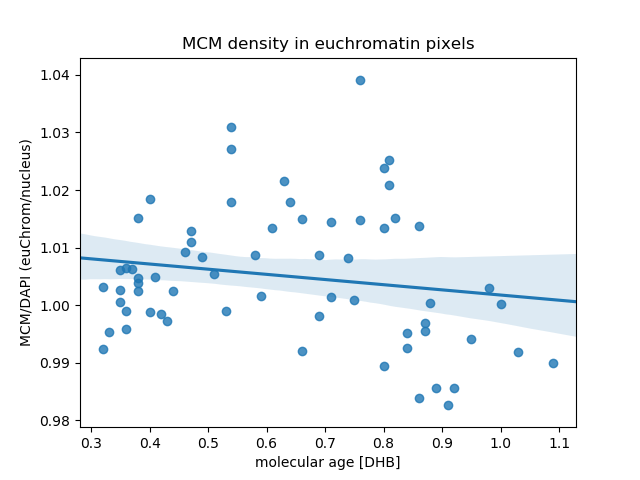

Text(0.5, 1.0, 'MCM density in euchromatin pixels')

In [21]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.euchro_20perc_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.euchro_20perc_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.regplot(x='molecularAge_ratio', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (euChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in euchromatin pixels")

In [22]:
x = np.array(myDataSelnd.molecularAge_ratio)
y = np.array(myDataSelnd.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)

In [23]:
myTrendDatand=myTrendDatand.append(pd.Series(['original', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## original - het/eu

### not deconvolved

<IPython.core.display.Javascript object>


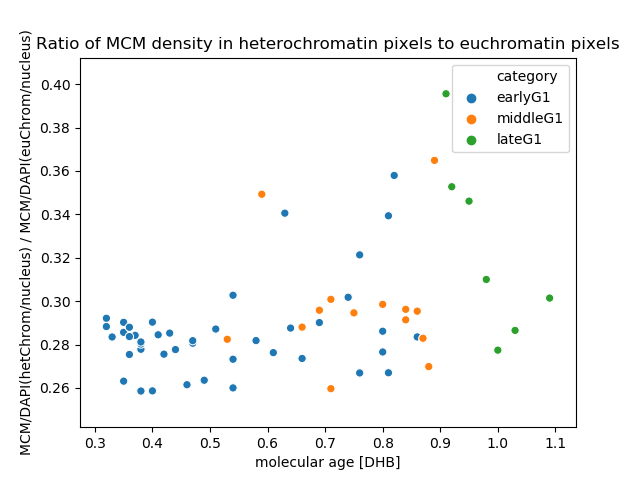

Text(0.5, 1.0, 'Ratio of MCM density in heterochromatin pixels to euchromatin pixels')

In [24]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_20perc_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.euchro_20perc_ch2/myDataSelnd.nucleus_Otsu_ch2)
sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI(hetChrom/nucleus) / MCM/DAPI(euChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("Ratio of MCM density in heterochromatin pixels to euchromatin pixels")

<IPython.core.display.Javascript object>


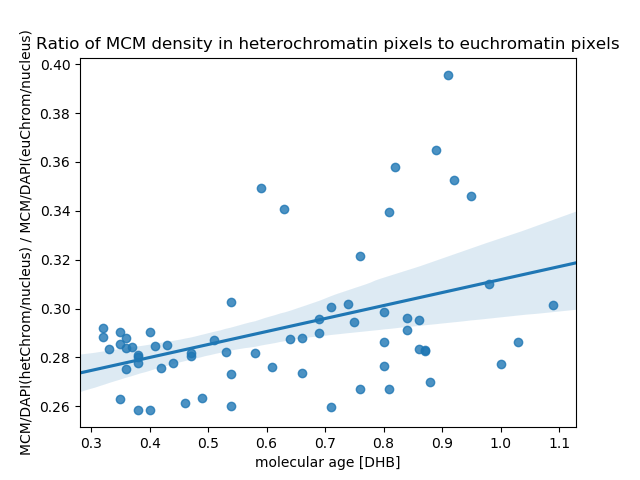

Text(0.5, 1.0, 'Ratio of MCM density in heterochromatin pixels to euchromatin pixels')

In [25]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_20perc_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.euchro_20perc_ch2/myDataSelnd.nucleus_Otsu_ch2)
sn.regplot(x='molecularAge_ratio', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI(hetChrom/nucleus) / MCM/DAPI(euChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("Ratio of MCM density in heterochromatin pixels to euchromatin pixels")

In [26]:
x = np.array(myDataSelnd.molecularAge_ratio)
y = np.array(myDataSelnd.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)

In [27]:
myTrendDataHetvsEu=myTrendDataHetvsEu.append(pd.Series(['original_nd', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### deconvolved

<IPython.core.display.Javascript object>


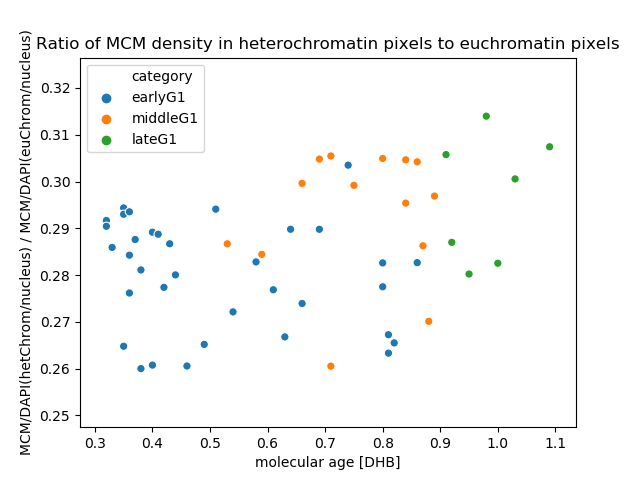

Text(0.5, 1.0, 'Ratio of MCM density in heterochromatin pixels to euchromatin pixels')

In [28]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.euchro_20perc_ch2/myDataSel.nucleus_Otsu_ch2)
sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI(hetChrom/nucleus) / MCM/DAPI(euChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("Ratio of MCM density in heterochromatin pixels to euchromatin pixels")

<IPython.core.display.Javascript object>


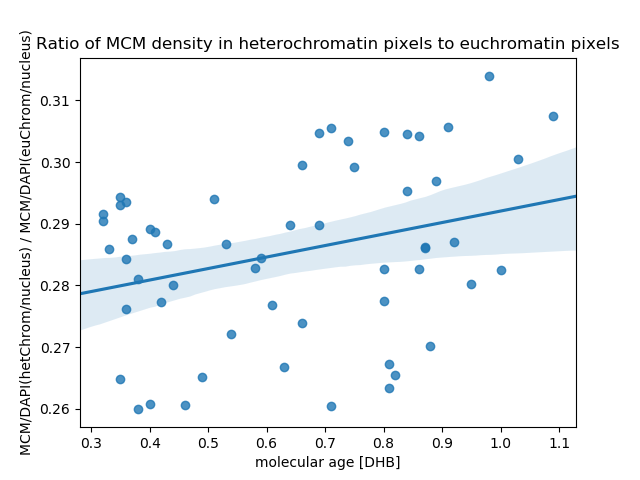

Text(0.5, 1.0, 'Ratio of MCM density in heterochromatin pixels to euchromatin pixels')

In [29]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.euchro_20perc_ch2/myDataSel.nucleus_Otsu_ch2)
sn.regplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI(hetChrom/nucleus) / MCM/DAPI(euChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("Ratio of MCM density in heterochromatin pixels to euchromatin pixels")

In [30]:
x = np.array(myDataSel.molecularAge_ratio)
y = np.array(myDataSel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)

In [31]:
myTrendDataHetvsEu=myTrendDataHetvsEu.append(pd.Series(['original', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

In [32]:
myTrendDataHetvsEu

,trendName,slope,intercept,rvalue,pvalue,stderr,rsquared
0,original_nd,0.019047,0.286444,0.167773,0.059375,0.010010,0.028148
1,original,0.010880,0.290230,0.096937,0.294286,0.010327,0.009397


# Modification

## modification = 0.3

### deconvolved

In [33]:
mod=0.3

In [34]:
myDataSel['mol_age_mod']=myDataSel.molecularAge_ratio
myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


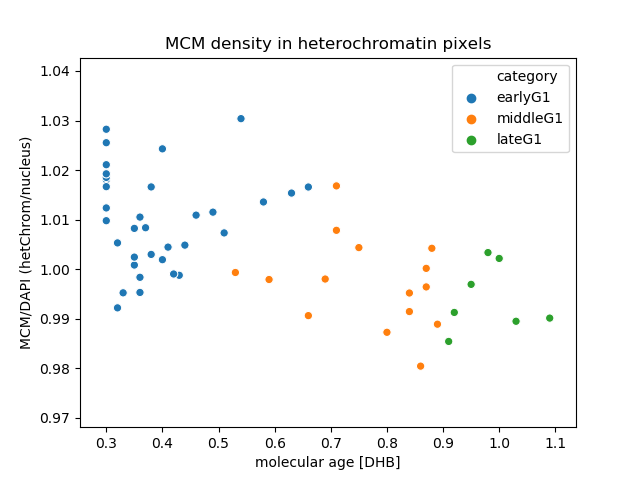

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [35]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.euchro_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.euchro_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


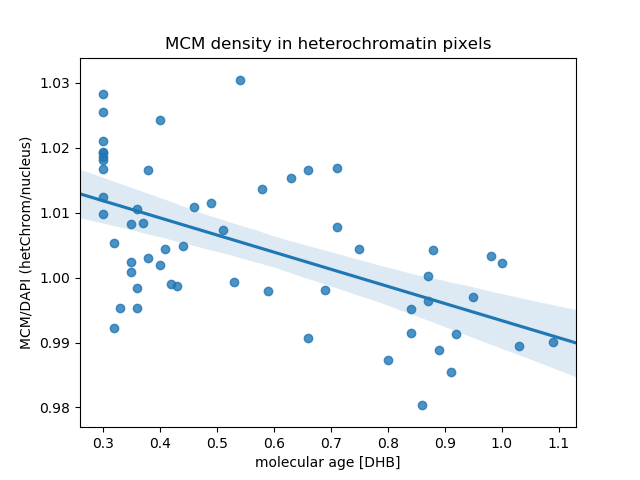

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [36]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.euchro_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.euchro_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [37]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)

In [38]:
myTrendData=myTrendData.append(pd.Series(['0.3', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

#### Het vs eu

<IPython.core.display.Javascript object>


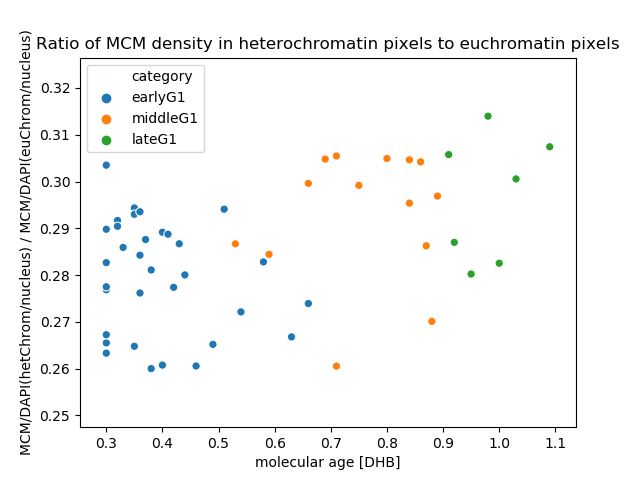

Text(0.5, 1.0, 'Ratio of MCM density in heterochromatin pixels to euchromatin pixels')

In [39]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.euchro_20perc_ch2/myDataSel.nucleus_Otsu_ch2)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI(hetChrom/nucleus) / MCM/DAPI(euChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("Ratio of MCM density in heterochromatin pixels to euchromatin pixels")

<IPython.core.display.Javascript object>


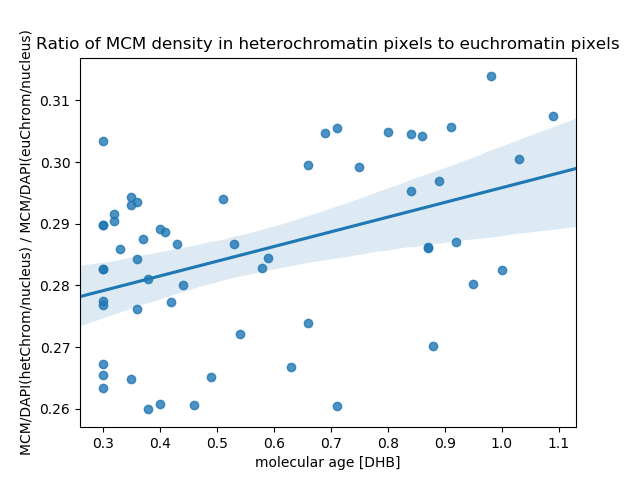

Text(0.5, 1.0, 'Ratio of MCM density in heterochromatin pixels to euchromatin pixels')

In [40]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.euchro_20perc_ch2/myDataSel.nucleus_Otsu_ch2)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI(hetChrom/nucleus) / MCM/DAPI(euChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("Ratio of MCM density in heterochromatin pixels to euchromatin pixels")

In [41]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)

In [42]:
myTrendDataHetvsEu=myTrendDataHetvsEu.append(pd.Series(['0.3', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### not deconvolved

In [43]:
myDataSelnd['mol_age_mod']=myDataSelnd.molecularAge_ratio
myDataSelnd.loc[((myDataSelnd.age_track<1.5) & (myDataSelnd.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


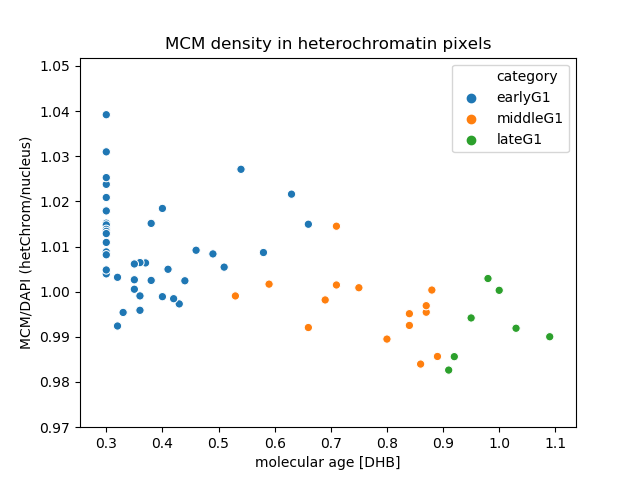

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [44]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.euchro_20perc_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.euchro_20perc_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


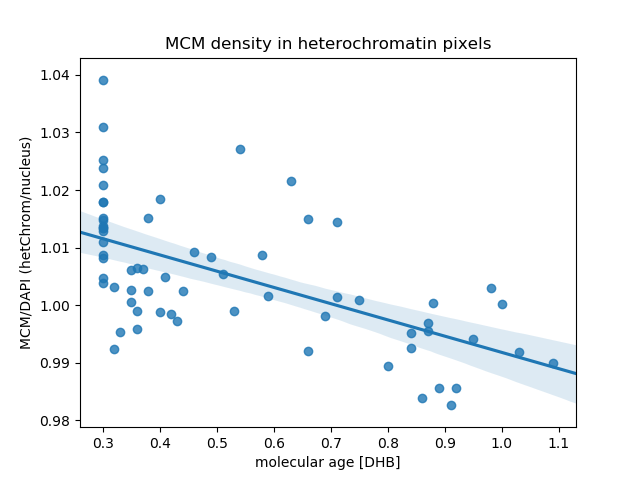

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [45]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.euchro_20perc_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.euchro_20perc_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [46]:
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)

In [47]:
myTrendDatand=myTrendDatand.append(pd.Series(['0.3', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

#### Het vs eu

<IPython.core.display.Javascript object>


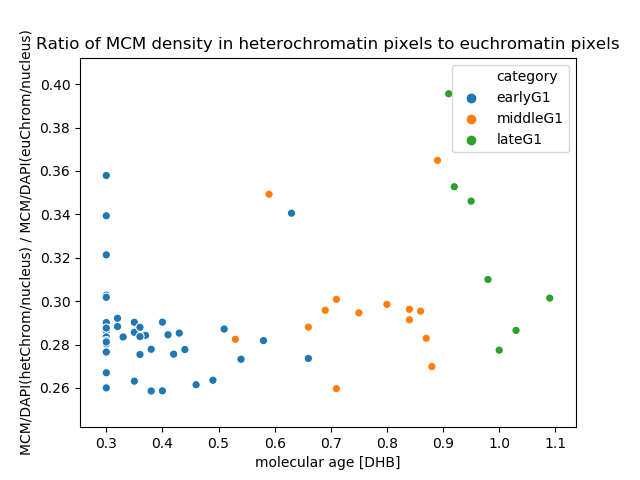

Text(0.5, 1.0, 'Ratio of MCM density in heterochromatin pixels to euchromatin pixels')

In [48]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_20perc_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.euchro_20perc_ch2/myDataSelnd.nucleus_Otsu_ch2)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI(hetChrom/nucleus) / MCM/DAPI(euChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("Ratio of MCM density in heterochromatin pixels to euchromatin pixels")

<IPython.core.display.Javascript object>


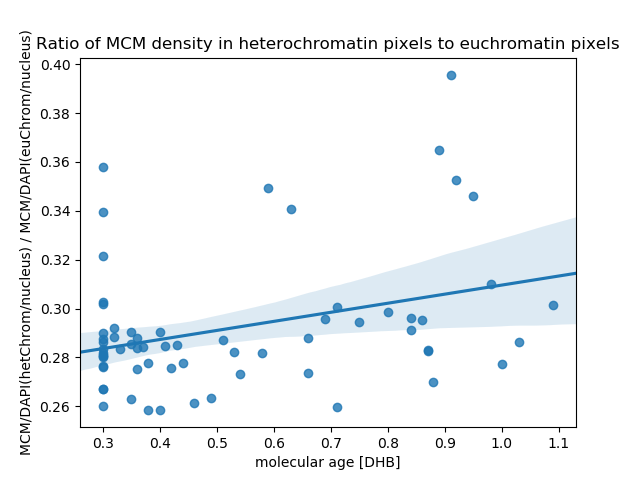

Text(0.5, 1.0, 'Ratio of MCM density in heterochromatin pixels to euchromatin pixels')

In [49]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_20perc_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.euchro_20perc_ch2/myDataSelnd.nucleus_Otsu_ch2)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI(hetChrom/nucleus) / MCM/DAPI(euChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("Ratio of MCM density in heterochromatin pixels to euchromatin pixels")

In [50]:
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)

In [51]:
myTrendDataHetvsEu=myTrendDataHetvsEu.append(pd.Series(['0.3_nd', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## modification = 0

### deconvolved

In [52]:
mod=0

In [53]:
myDataSel['mol_age_mod']=myDataSel.molecularAge_ratio
myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


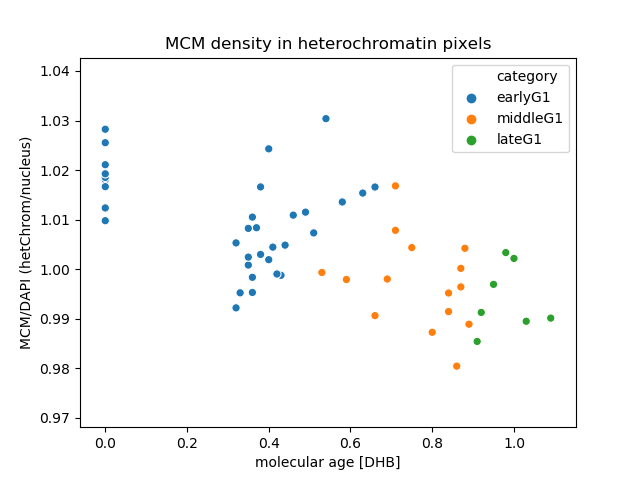

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [54]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.euchro_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.euchro_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


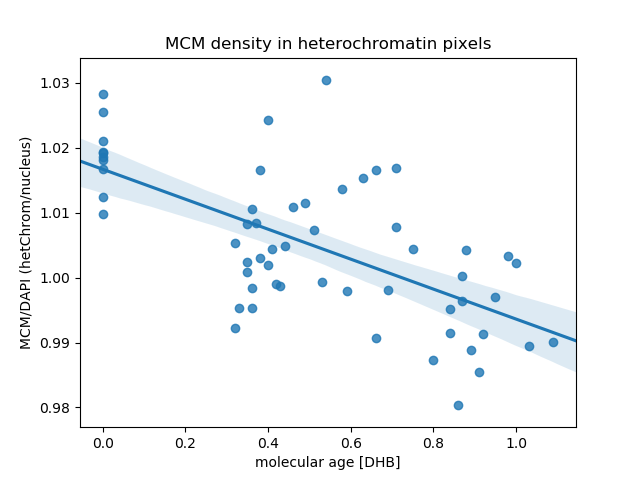

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [55]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.euchro_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.euchro_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [56]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)

In [57]:
myTrendData=myTrendData.append(pd.Series(['0', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

#### Het vs eu

<IPython.core.display.Javascript object>


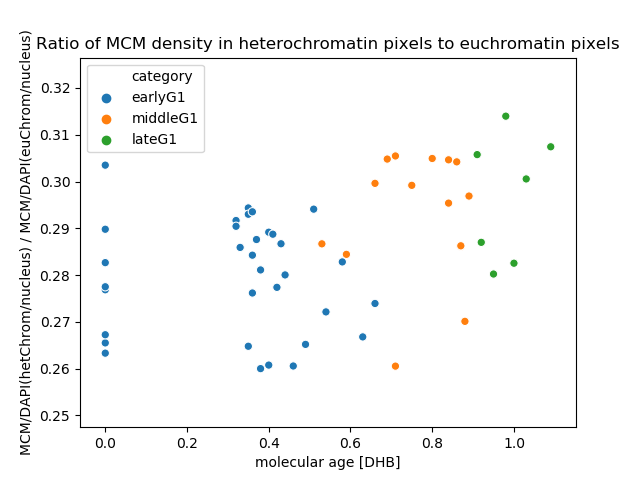

Text(0.5, 1.0, 'Ratio of MCM density in heterochromatin pixels to euchromatin pixels')

In [58]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.euchro_20perc_ch2/myDataSel.nucleus_Otsu_ch2)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI(hetChrom/nucleus) / MCM/DAPI(euChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("Ratio of MCM density in heterochromatin pixels to euchromatin pixels")

<IPython.core.display.Javascript object>


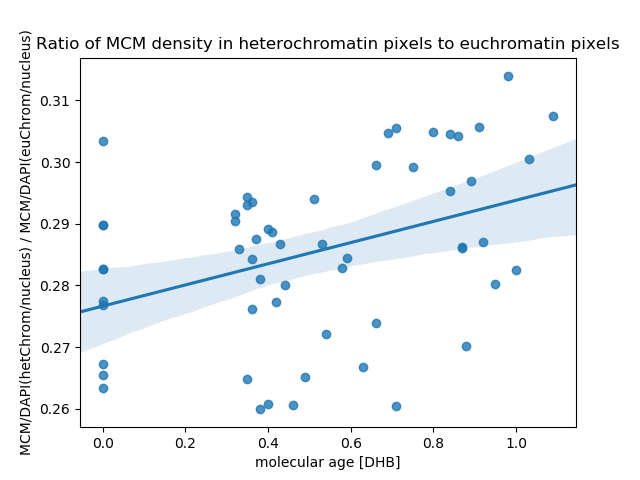

Text(0.5, 1.0, 'Ratio of MCM density in heterochromatin pixels to euchromatin pixels')

In [59]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.euchro_20perc_ch2/myDataSel.nucleus_Otsu_ch2)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI(hetChrom/nucleus) / MCM/DAPI(euChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("Ratio of MCM density in heterochromatin pixels to euchromatin pixels")

In [60]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)

In [61]:
myTrendDataHetvsEu=myTrendDataHetvsEu.append(pd.Series(['0', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### not deconvolved

In [62]:
myDataSelnd['mol_age_mod']=myDataSelnd.molecularAge_ratio
myDataSelnd.loc[((myDataSelnd.age_track<1.5) & (myDataSelnd.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


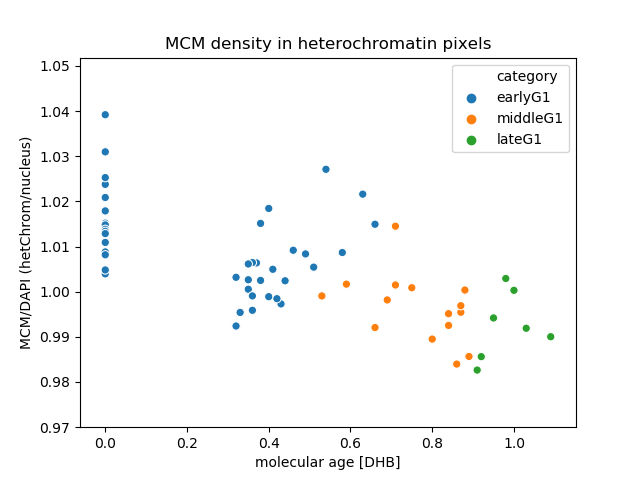

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [63]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.euchro_20perc_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.euchro_20perc_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


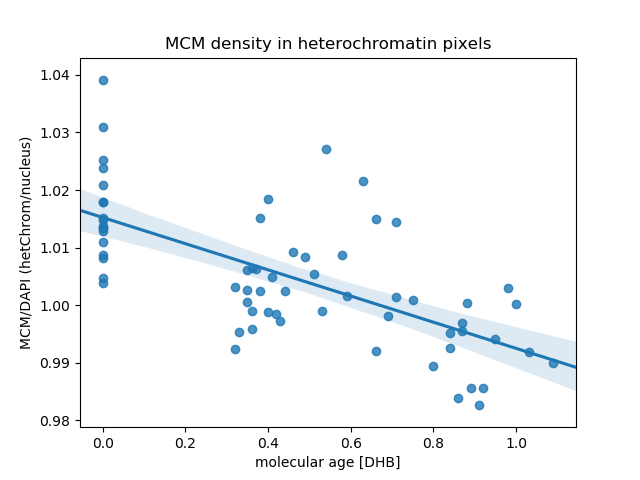

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [64]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.euchro_20perc_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.euchro_20perc_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [65]:
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)

In [66]:
myTrendDatand=myTrendDatand.append(pd.Series(['0', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

#### Het/eu

<IPython.core.display.Javascript object>


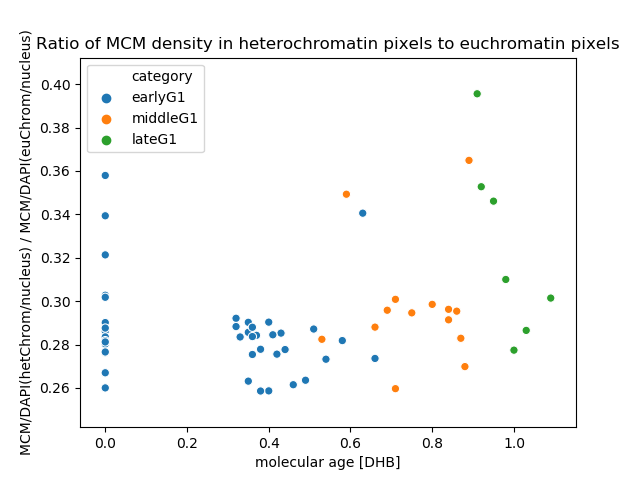

Text(0.5, 1.0, 'Ratio of MCM density in heterochromatin pixels to euchromatin pixels')

In [67]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_20perc_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.euchro_20perc_ch2/myDataSelnd.nucleus_Otsu_ch2)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI(hetChrom/nucleus) / MCM/DAPI(euChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("Ratio of MCM density in heterochromatin pixels to euchromatin pixels")

<IPython.core.display.Javascript object>


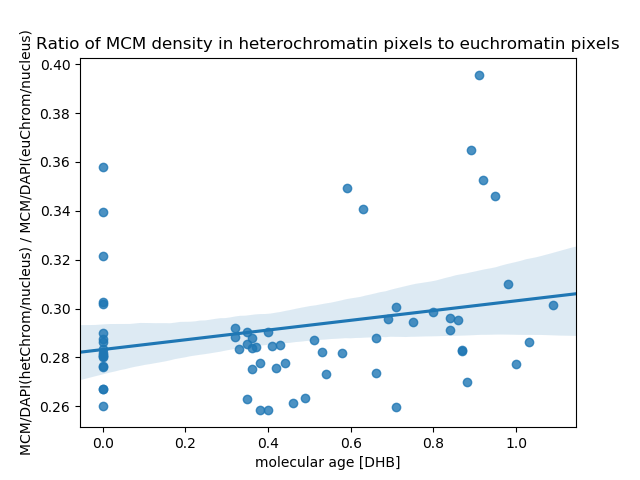

Text(0.5, 1.0, 'Ratio of MCM density in heterochromatin pixels to euchromatin pixels')

In [68]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_20perc_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.euchro_20perc_ch2/myDataSelnd.nucleus_Otsu_ch2)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI(hetChrom/nucleus) / MCM/DAPI(euChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("Ratio of MCM density in heterochromatin pixels to euchromatin pixels")

In [69]:
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)

In [70]:
myTrendDataHetvsEu=myTrendDataHetvsEu.append(pd.Series(['0_nd', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### modification = 0.5

In [71]:
mod=0.5

In [72]:
myDataSel['mol_age_mod']=myDataSel.molecularAge_ratio
myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


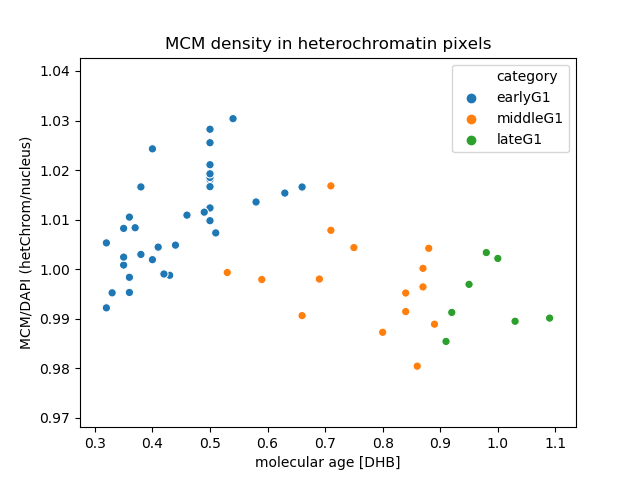

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [73]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.euchro_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.euchro_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


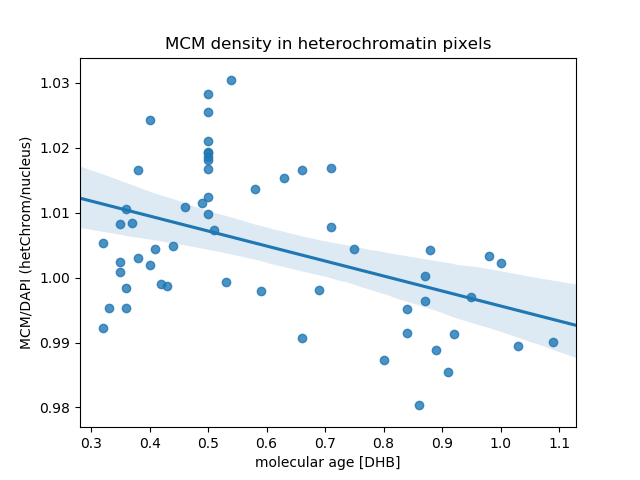

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [74]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.euchro_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.euchro_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [75]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)

In [76]:
myTrendData=myTrendData.append(pd.Series(['0', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

#### Het vs eu

<IPython.core.display.Javascript object>


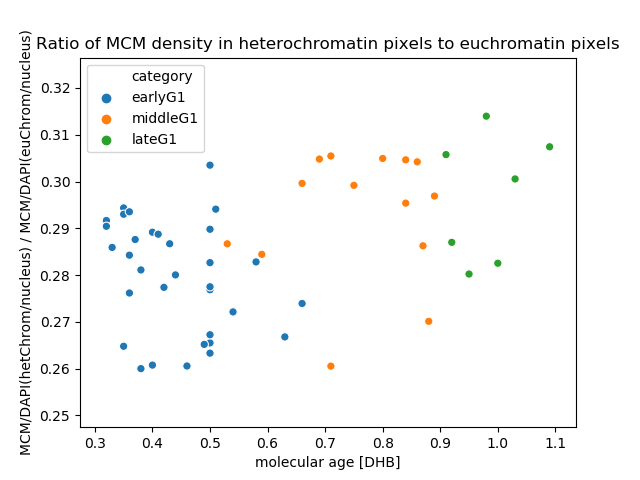

Text(0.5, 1.0, 'Ratio of MCM density in heterochromatin pixels to euchromatin pixels')

In [77]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.euchro_20perc_ch2/myDataSel.nucleus_Otsu_ch2)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI(hetChrom/nucleus) / MCM/DAPI(euChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("Ratio of MCM density in heterochromatin pixels to euchromatin pixels")

<IPython.core.display.Javascript object>


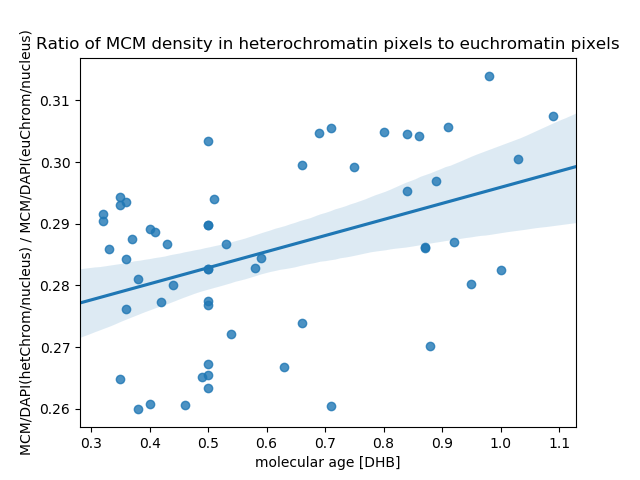

Text(0.5, 1.0, 'Ratio of MCM density in heterochromatin pixels to euchromatin pixels')

In [78]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.euchro_20perc_ch2/myDataSel.nucleus_Otsu_ch2)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI(hetChrom/nucleus) / MCM/DAPI(euChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("Ratio of MCM density in heterochromatin pixels to euchromatin pixels")

In [79]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)

In [80]:
myTrendDataHetvsEu=myTrendDataHetvsEu.append(pd.Series(['0.5', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

#### not deconvolved

In [81]:
myDataSelnd['mol_age_mod']=myDataSelnd.molecularAge_ratio
myDataSelnd.loc[((myDataSelnd.age_track<1.5) & (myDataSelnd.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


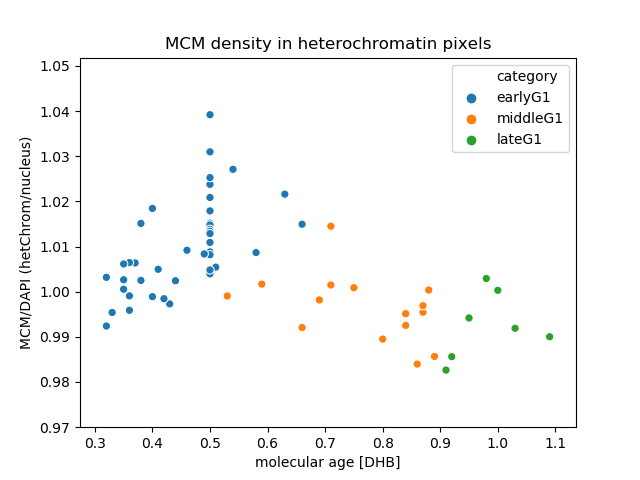

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [82]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.euchro_20perc_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.euchro_20perc_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


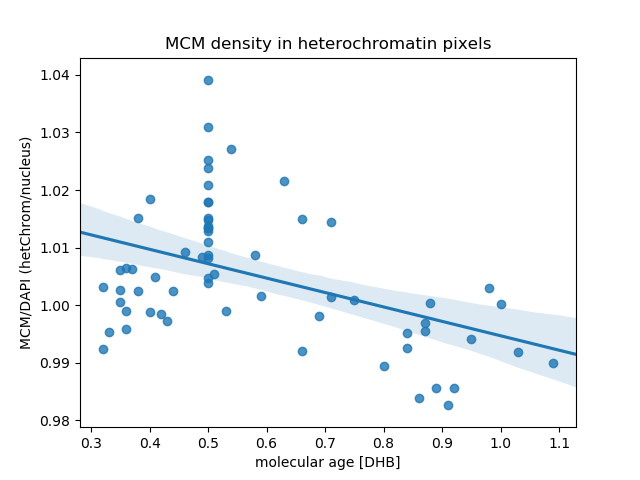

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [83]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.euchro_20perc_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.euchro_20perc_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [84]:
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)

In [85]:
myTrendDatand=myTrendDatand.append(pd.Series(['0.5', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

#### Het/eu

<IPython.core.display.Javascript object>


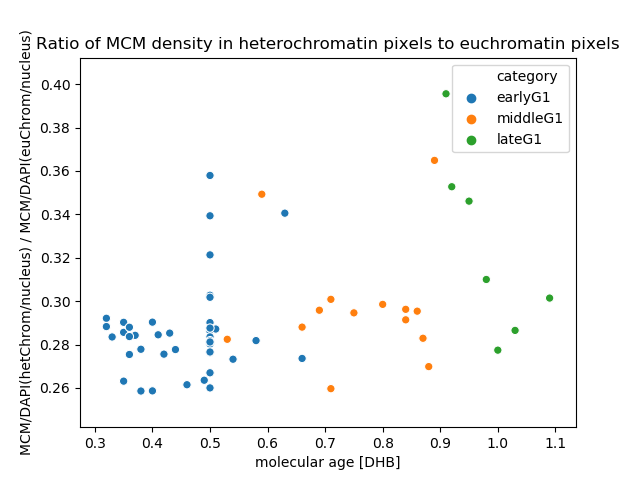

Text(0.5, 1.0, 'Ratio of MCM density in heterochromatin pixels to euchromatin pixels')

In [86]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_20perc_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.euchro_20perc_ch2/myDataSelnd.nucleus_Otsu_ch2)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI(hetChrom/nucleus) / MCM/DAPI(euChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("Ratio of MCM density in heterochromatin pixels to euchromatin pixels")

<IPython.core.display.Javascript object>


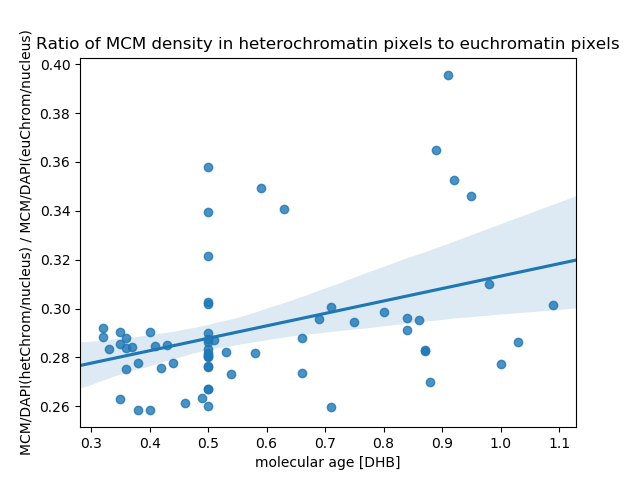

Text(0.5, 1.0, 'Ratio of MCM density in heterochromatin pixels to euchromatin pixels')

In [87]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_20perc_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.euchro_20perc_ch2/myDataSelnd.nucleus_Otsu_ch2)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI(hetChrom/nucleus) / MCM/DAPI(euChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("Ratio of MCM density in heterochromatin pixels to euchromatin pixels")

In [88]:
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)

In [89]:
myTrendDataHetvsEu=myTrendDataHetvsEu.append(pd.Series(['0.5_nd', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### amy's modification 
making it negative and adding the max value from the selection 

In [90]:
myDataSel['mol_age_mod']=myDataSel.molecularAge_ratio
myDataSel_mol_age_change=myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']

In [91]:
myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']=-1*myDataSel['mol_age_mod']+np.max(myDataSel_mol_age_change)

<IPython.core.display.Javascript object>


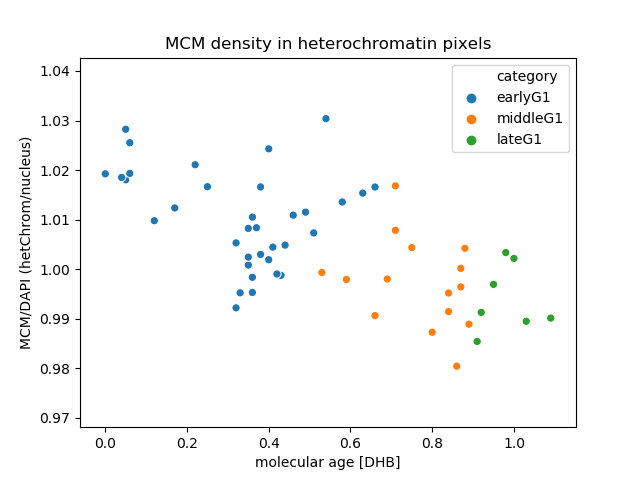

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [92]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.euchro_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.euchro_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


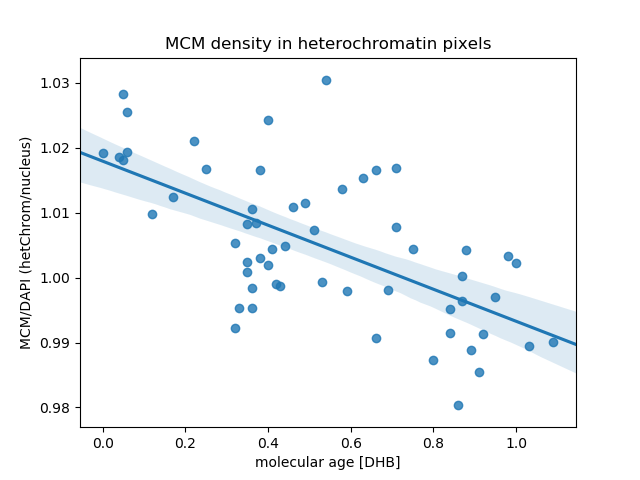

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [93]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.euchro_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.euchro_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [94]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)

In [95]:
myTrendData=myTrendData.append(pd.Series(['amy_mod', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

#### Het vs eu

<IPython.core.display.Javascript object>


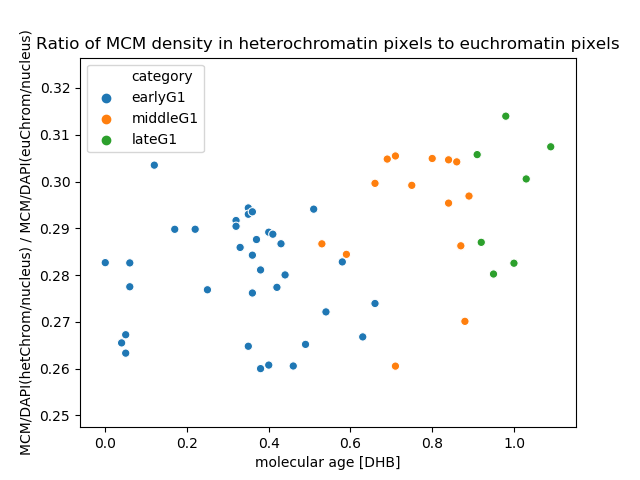

Text(0.5, 1.0, 'Ratio of MCM density in heterochromatin pixels to euchromatin pixels')

In [96]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.euchro_20perc_ch2/myDataSel.nucleus_Otsu_ch2)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI(hetChrom/nucleus) / MCM/DAPI(euChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("Ratio of MCM density in heterochromatin pixels to euchromatin pixels")

<IPython.core.display.Javascript object>


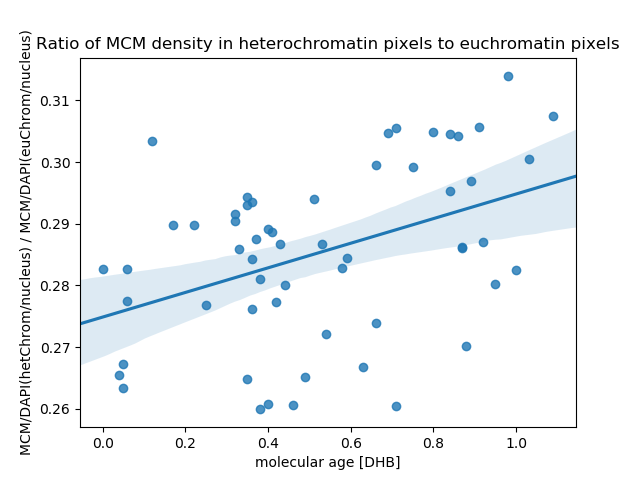

Text(0.5, 1.0, 'Ratio of MCM density in heterochromatin pixels to euchromatin pixels')

In [97]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.euchro_20perc_ch2/myDataSel.nucleus_Otsu_ch2)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI(hetChrom/nucleus) / MCM/DAPI(euChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("Ratio of MCM density in heterochromatin pixels to euchromatin pixels")

In [98]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)

In [99]:
myTrendDataHetvsEu=myTrendDataHetvsEu.append(pd.Series(['amy_mod', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### not deconvolved

In [100]:
myDataSelnd['mol_age_mod']=myDataSelnd.molecularAge_ratio
myDataSelnd.loc[((myDataSelnd.age_track<1.5) & (myDataSelnd.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


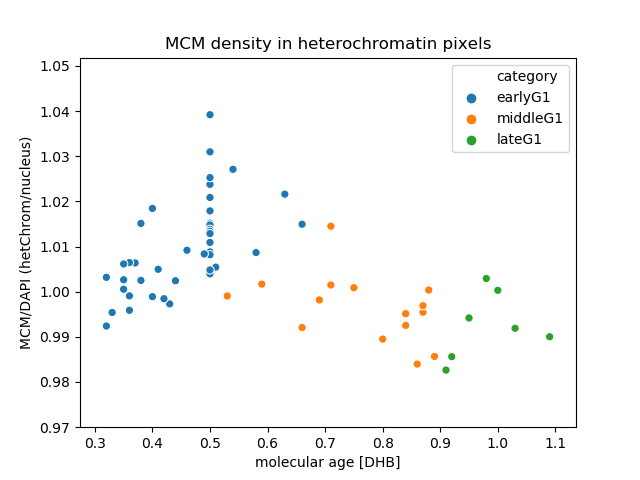

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [101]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.euchro_20perc_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.euchro_20perc_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


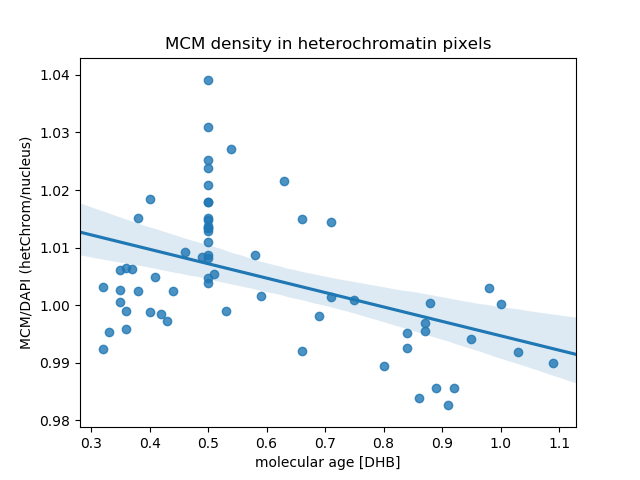

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [102]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.euchro_20perc_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.euchro_20perc_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [103]:
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)

In [104]:
myTrendDatand=myTrendDatand.append(pd.Series(['amy_mod', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

#### Het/eu

<IPython.core.display.Javascript object>


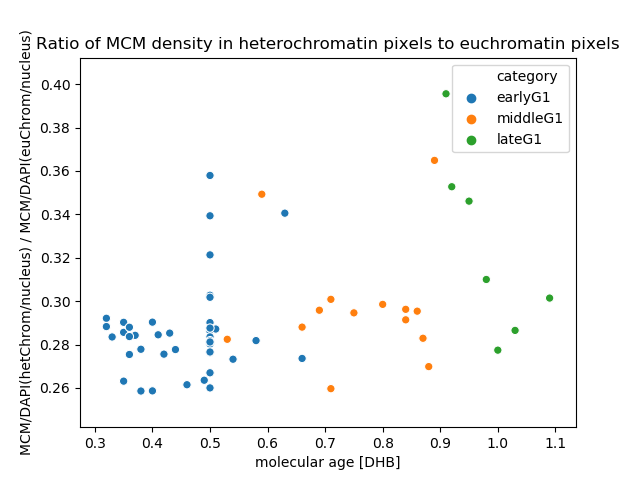

Text(0.5, 1.0, 'Ratio of MCM density in heterochromatin pixels to euchromatin pixels')

In [105]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_20perc_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.euchro_20perc_ch2/myDataSelnd.nucleus_Otsu_ch2)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI(hetChrom/nucleus) / MCM/DAPI(euChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("Ratio of MCM density in heterochromatin pixels to euchromatin pixels")

<IPython.core.display.Javascript object>


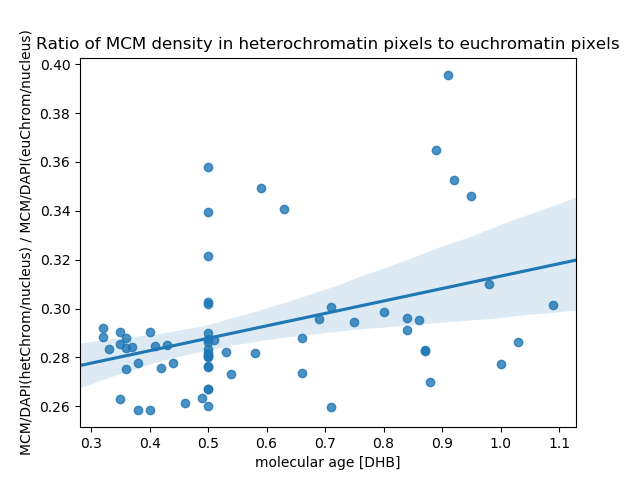

Text(0.5, 1.0, 'Ratio of MCM density in heterochromatin pixels to euchromatin pixels')

In [106]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_20perc_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.euchro_20perc_ch2/myDataSelnd.nucleus_Otsu_ch2)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI(hetChrom/nucleus) / MCM/DAPI(euChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("Ratio of MCM density in heterochromatin pixels to euchromatin pixels")

In [107]:
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)

In [108]:
myTrendDataHetvsEu=myTrendDataHetvsEu.append(pd.Series(['amy_mod_nd', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

# review

In [109]:
myTrendData['pvalue significance']=True
for i, mod in myTrendData.iterrows():
    if myTrendData.at[i,'pvalue']>0.05:
        myTrendData.at[i,'pvalue significance']=False

In [110]:
myTrendDatand['pvalue significance']=True
for i, mod in myTrendDatand.iterrows():
    if myTrendDatand.at[i,'pvalue']>0.05:
        myTrendDatand.at[i,'pvalue significance']=False

In [111]:
myTrendDataHetvsEu['pvalue significance']=True
for i, mod in myTrendDataHetvsEu.iterrows():
    if myTrendDataHetvsEu.at[i,'pvalue']>0.05:
        myTrendDataHetvsEu.at[i,'pvalue significance']=False

In [112]:
myTrendData

,trendName,slope,intercept,rvalue,pvalue,stderr,rsquared,pvalue significance
0,original,-0.008299,1.005018,-0.121069,0.189656,0.006291,0.014658,False
1,0.3,-0.012636,1.007665,-0.197578,0.031252,0.005796,0.039037,True
2,0,-0.013796,1.007990,-0.245454,0.007132,0.005037,0.060248,True
3,0,-0.010341,1.006303,-0.152112,0.098645,0.006212,0.023138,False
4,amy_mod,-0.011765,1.006869,-0.197200,0.031584,0.005407,0.038888,True


In [113]:
myTrendDatand

,trendName,slope,intercept,rvalue,pvalue,stderr,rsquared,pvalue significance
0,original,-0.008456,1.005864,-0.138051,0.121672,0.005426,0.019058,False
1,0.3,-0.013579,1.008823,-0.242418,0.006033,0.004861,0.058767,True
2,0,-0.014398,1.008626,-0.304362,0.000503,0.004030,0.092636,True
3,0.5,-0.010880,1.007380,-0.178343,0.044849,0.005369,0.031806,True
4,amy_mod,-0.010880,1.007380,-0.178343,0.044849,0.005369,0.031806,True


In [114]:
myTrendDataHetvsEu

,trendName,slope,intercept,rvalue,pvalue,stderr,rsquared,pvalue significance
0,original_nd,0.019047,0.286444,0.167773,0.059375,0.010010,0.028148,False
1,original,0.010880,0.290230,0.096937,0.294286,0.010327,0.009397,False
2,0.3,0.012143,0.289852,0.115973,0.209115,0.009615,0.013450,False
3,0.3_nd,0.015238,0.290126,0.146780,0.099618,0.009185,0.021544,False
4,0,0.011938,0.290416,0.129732,0.159657,0.008436,0.016830,False
5,0_nd,0.012748,0.292467,0.145409,0.102857,0.007758,0.021144,False
6,0.5,0.011225,0.290230,0.100851,0.275130,0.010237,0.010171,False
7,0.5_nd,0.015989,0.289066,0.141409,0.112780,0.010011,0.019997,False
8,amy_mod,0.010396,0.291239,0.106428,0.249314,0.008979,0.011327,False
9,amy_mod_nd,0.015989,0.289066,0.141409,0.112780,0.010011,0.019997,False


### notes on these stats

r squared 
- percentage of the response variable variation that is explained by a linear model

p value
- lower the p value, more likely the model is significant since the changes in the predictor's value (p value) are related to changes in the repsonse variable. 

## molecular age vs physical age of selected cells

In [115]:
myDataSel_mol_age_change=myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),('molecularAge_ratio','age_track')]

In [116]:
myDataSel_mol_age_change

,molecularAge_ratio,age_track
25,0.82,0.666667
26,0.82,0.666667
62,0.81,0.666667
63,0.82,1.000000
98,0.80,0.333333
99,0.69,0.333333
100,0.74,0.833333
101,0.86,0.666667
137,0.61,1.166667
138,0.64,0.833333


<IPython.core.display.Javascript object>


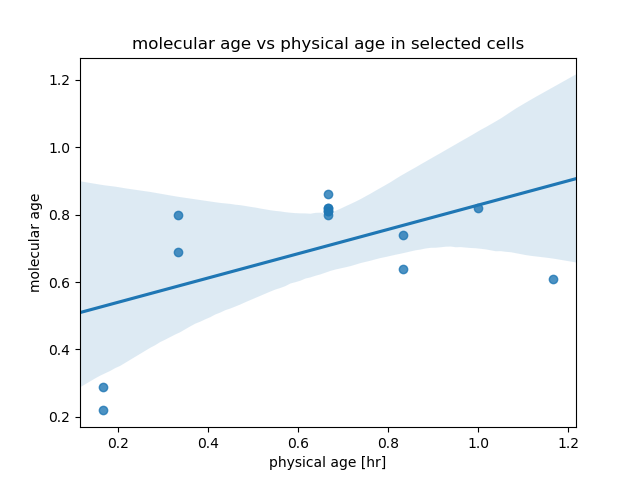

Text(0.5, 1.0, 'molecular age vs physical age in selected cells')

In [117]:
%matplotlib notebook

#myDataSel['temp']=(myDataSel.hetChrom_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='age_track', y = 'molecularAge_ratio', data=myDataSel_mol_age_change)
plt.ylabel("molecular age")
plt.xlabel("physical age [hr]")
plt.title("molecular age vs physical age in selected cells")

In [118]:
myDataSelnd_mol_age_change=myDataSelnd.loc[((myDataSelnd.age_track<1.5) & (myDataSelnd.category=='earlyG1')),('molecularAge_ratio','age_track')]

In [119]:
myDataSelnd_mol_age_change

,molecularAge_ratio,age_track
0,0.82,0.666667
1,0.82,0.666667
50,0.81,0.666667
51,0.82,1.000000
60,0.54,0.333333
61,0.76,0.333333
72,0.54,0.333333
73,0.76,0.333333
74,0.80,0.333333
75,0.69,0.333333


<IPython.core.display.Javascript object>


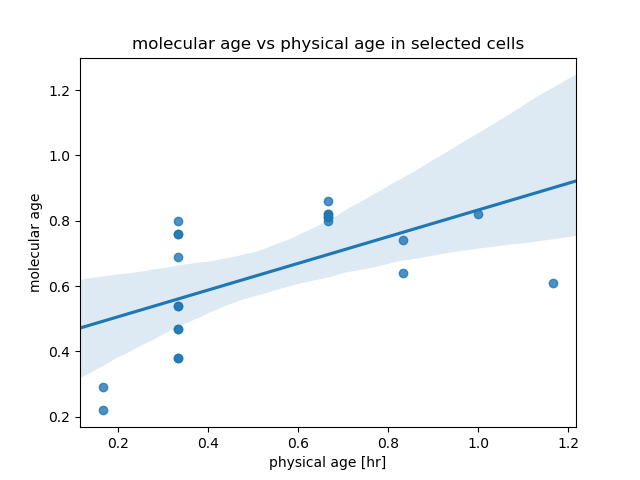

Text(0.5, 1.0, 'molecular age vs physical age in selected cells')

In [120]:
%matplotlib notebook

#myDataSel['temp']=(myDataSel.hetChrom_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='age_track', y = 'molecularAge_ratio', data=myDataSelnd_mol_age_change)
plt.ylabel("molecular age")
plt.xlabel("physical age [hr]")
plt.title("molecular age vs physical age in selected cells")

#### notes
this is not what we expected to see... expected a negative relationship of physical age and molecular age for the selected cells. 

interesting thing is that if we use these cells and re-arrange them as if their physical age is correlated to molecular age, the trend does have some significance. 

### answers to questions 

- does distribution of points(shifted ones) change the trend?

yes, distributing the points and shifting them around do change the trend as shown in myTrendData. The regression line stats are different from original (trend that was not shifted). 

- does changing the aribtrary numbers to 0 and 0.5 change the trend from what was shown in trend for 0.3?

yes, the trends stats show the difference in the trend for difference in the numbers

- was it worth a try to modify how amy thought the modification should be done?

no and yes. no, because when looked into the graph of molecular age vs physical age, there is not strong relationship between physical and molecular age, meaning that reordering the cells and reassigning the values may not mean anything. 
however, yes, because the trend made with this modification shows some significance. although we cannot ignore the fact that there is no significant relationship between physical age and molecular age within these selected cells, this type of modification still led the trend/model to be valuable. 
